In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Data Biaya Perawatan Rumah Sakit.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [4]:
print(x)

[[   25 17000]
 [   65 22000]
 [   22 10000]
 [   27 30000]
 [   19 15000]
 [   38 20000]
 [   48 13000]
 [   68 50000]
 [   33 25000]
 [   58 35000]]


In [5]:
print(y)

[0 0 1 0 1 0 0 1 0 0]


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25 , random_state=0)

In [7]:
print(x_train)

[[   58 35000]
 [   65 22000]
 [   48 13000]
 [   68 50000]
 [   27 30000]
 [   25 17000]
 [   38 20000]]


In [8]:
print(x_test)

[[   22 10000]
 [   33 25000]
 [   19 15000]]


In [9]:
print(y_train)

[0 0 0 1 0 0 0]


In [10]:
print(y_test)

[1 0 1]


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
print(x_train)

[[ 0.6762717   0.70335331]
 [ 1.10662642 -0.40018378]
 [ 0.06147925 -1.164171  ]
 [ 1.29106415  1.97666534]
 [-1.22958491  0.27891597]
 [-1.3525434  -0.82462113]
 [-0.55331321 -0.56995872]]


In [13]:
print(x_test)

[[-1.53698114 -1.41883341]
 [-0.86070944 -0.14552138]
 [-1.72141887 -0.99439606]]


In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
y_pred = classifier.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0]
 [2 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


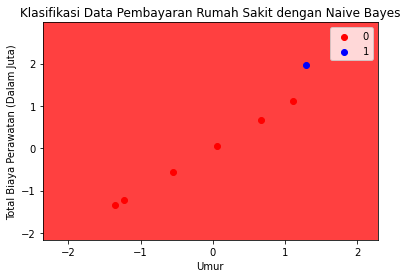

In [23]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:,1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1 , x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i , j in enumerate(np.unique(y_set)) :
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j , i],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Klasifikasi Data Pembayaran Rumah Sakit dengan Naive Bayes')
plt.xlabel('Umur')
plt.ylabel('Total Biaya Perawatan (Dalam Juta)')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


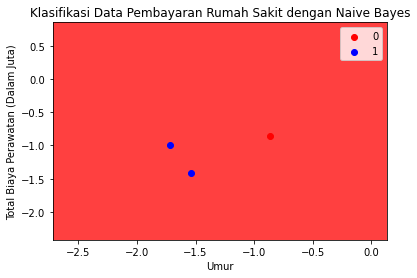

In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:,1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1 , x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i , j in enumerate(np.unique(y_set)) :
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j , i],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Klasifikasi Data Pembayaran Rumah Sakit dengan Naive Bayes')
plt.xlabel('Umur')
plt.ylabel('Total Biaya Perawatan (Dalam Juta)')
plt.legend()
plt.show()